# Examples

In [1]:
import beautifulplots as bp
import pandas as pd

## Barplot

Data:Product Category Sales by Store


,category,sales,store,units
0,groceries,900,Store-A,180.0
1,groceries,600,Store-B,120.0
2,groceries,500,Store-C,100.0
3,hardware,500,Store-A,50.0
4,hardware,300,Store-B,30.0
5,hardware,200,Store-C,20.0
6,hobbies,400,Store-A,20.0
7,hobbies,400,Store-B,20.0
8,hobbies,200,Store-C,10.0


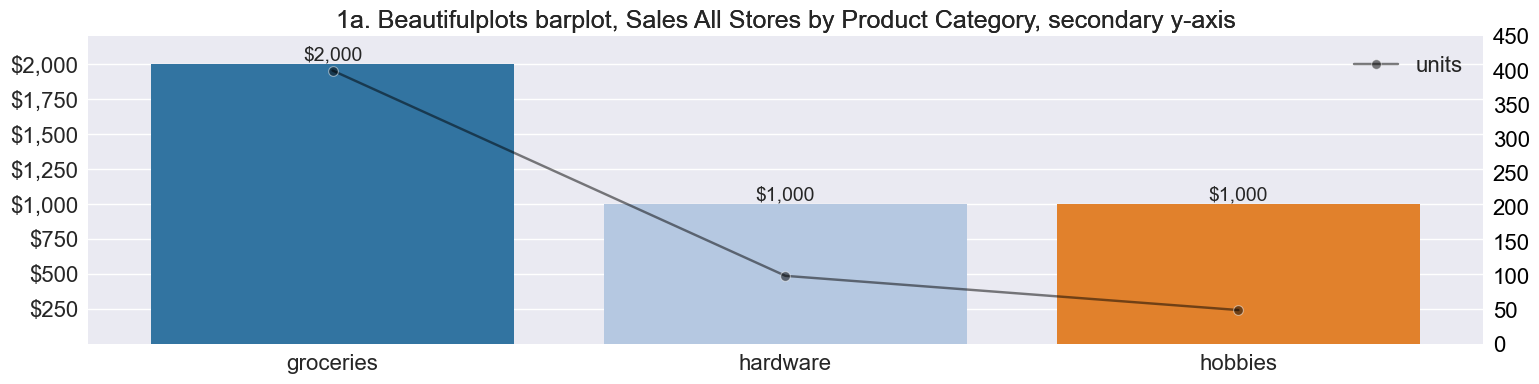

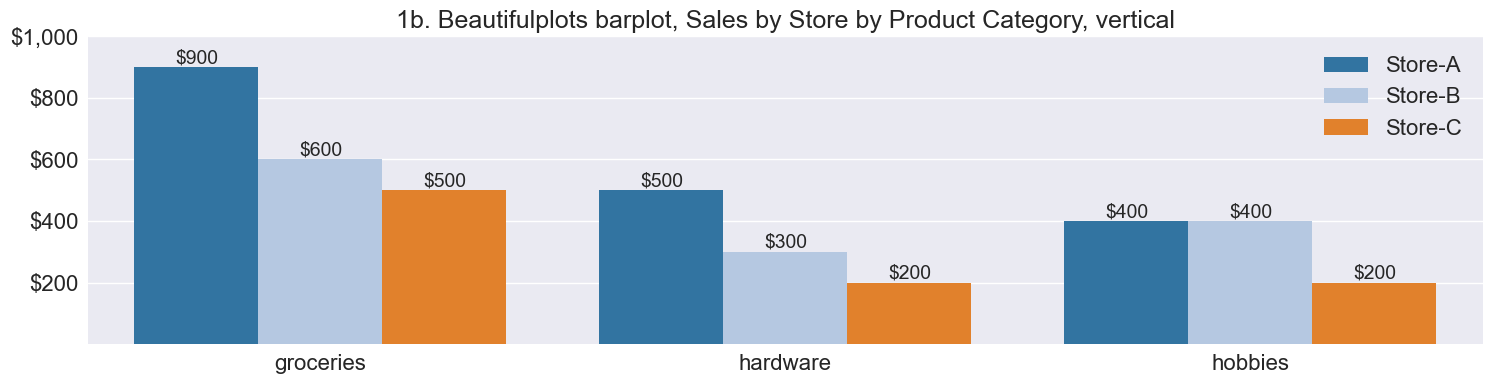

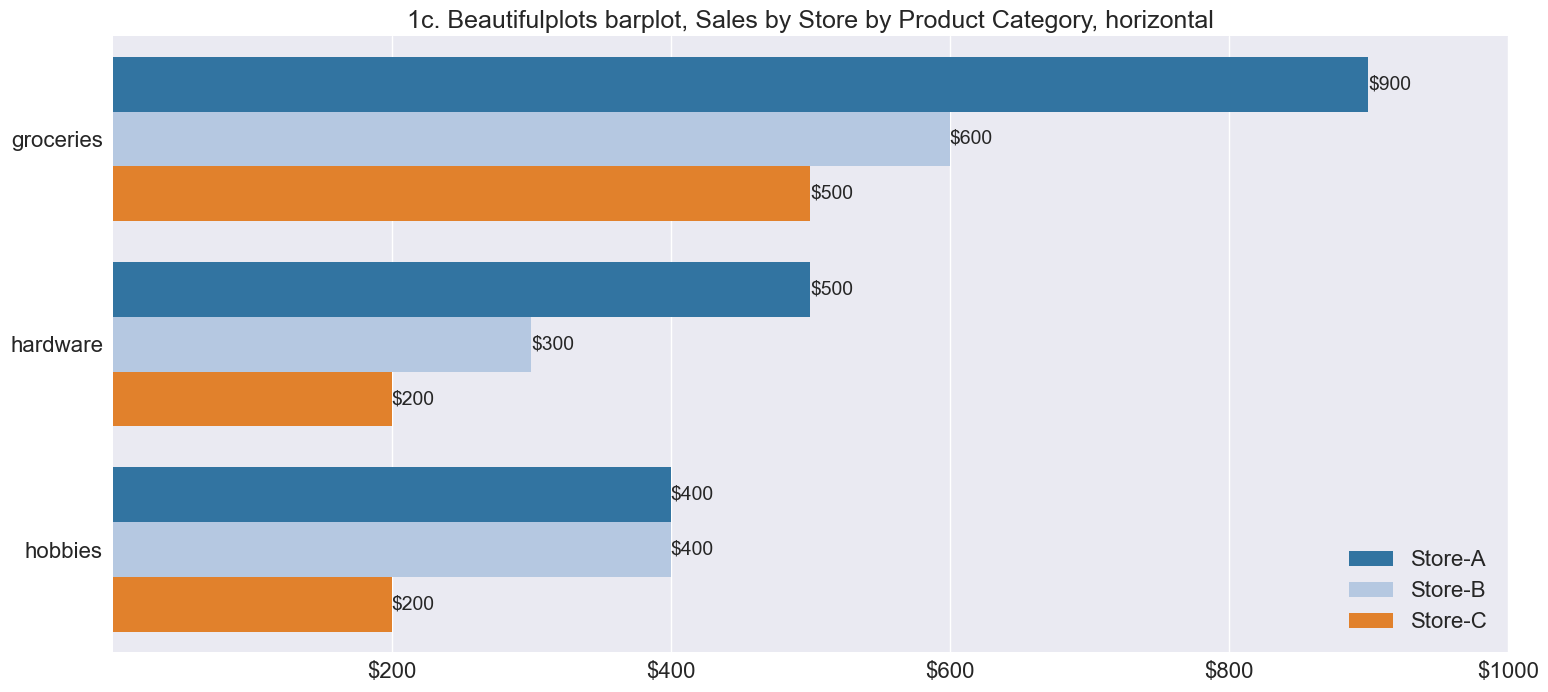

In [2]:

# Data and Dataframe
print('Data:Product Category Sales by Store')
barplot_data = { 'category':['groceries','groceries','groceries', 'hardware','hardware','hardware','hobbies','hobbies','hobbies'] ,
                'sales':[ 900, 600,500, 500,300,200,400,400,200], 'store':['Store-A','Store-B','Store-C','Store-A','Store-B','Store-C','Store-A','Store-B','Store-C'] }

df = pd.DataFrame(barplot_data)
# unit sales by category ... assume some average sale price per category
def unit_sales(row):
    units = 0
    if row['category'] == 'groceries': units = row['sales']/5
    elif row['category'] == 'hardware': units = row['sales']/10
    elif row['category'] == 'hobbies': units = row['sales']/20
    return units
df['units']= df.apply(lambda row: unit_sales(row),axis=1)
display(df)



# Plots

# Example 1a
bp.barplot(df,'category','sales', palette='tab20', 
                   title='1a. Beautifulplots barplot, Sales All Stores by Product Category, secondary y-axis', figsize=(18,4),
                   bardatalabels=True, bardataformat=",.0f", barcurrency="$", y_lims = (0.1,2200), estimator2=sum,
                   y2='units',y_lims2=(0,450),y2_axis_label='units', color2='black',marker2="o", y2_axis_format=".0f")

# Example 1b
bp.barplot(df,'category','sales',hue='store', palette='tab20', 
                   title='1b. Beautifulplots barplot, Sales by Store by Product Category, vertical', figsize=(18,4),
                   bardatalabels=True, barcurrency="$", bardataformat=",.0f",
                   y_lims = (0.1,1000))

# Example 1c
bp.barplot(df,'category','sales',hue='store', palette='tab20', 
                   title='1c. Beautifulplots barplot, Sales by Store by Product Category, horizontal', figsize=(18,8), 
                   bardatalabels=True, bardataformat=".0f", barcurrency="$", barorientation='h',
                   x_lims = (0.1,1000), legend_loc="lower right")



## Lineplot

,Date,Close,High,Low,Open,Volume,Adj Close
0,1950-01-03,16.66,16.66,16.66,16.66,1260000.0,NaN
1,1950-01-04,16.85,16.85,16.85,16.85,1890000.0,NaN
2,1950-01-05,16.93,16.93,16.93,16.93,2550000.0,NaN
3,1950-01-06,16.98,16.98,16.98,16.98,2010000.0,NaN
4,1950-01-09,17.08,17.08,17.08,17.08,2520000.0,NaN


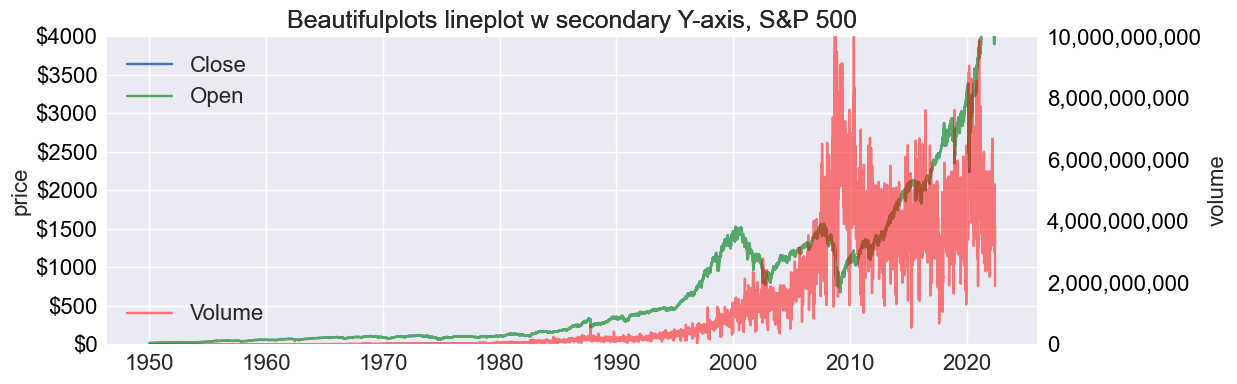

In [7]:
import datetime as dt

# Data - S&P 500
sp500_file =  '../data/GSPC_1950-1-3_to_2022-6-8.csv'
df_sp500 = pd.read_csv(sp500_file,index_col=0,parse_dates=True)
df = df_sp500.reset_index() # reset index ...  Seaborn and thus beautifulpltos requires x-axis to be a column
display(df.head())


# bp lineplot
bp.lineplot(df,x='Date' , y=['Close','Open'], y2='Volume',y_axis_format=".0f",y_currency="$", y2_axis_format=",.0f",
             y_lims=(0,4000), y_lims2=(0,10*1e9), legend_loc2 = "lower left", color2='red',
             figsize=[12,4], legend=True, y_axis_label = "price", y2_axis_label="volume", x_label="date",
             title="Beautifulplots lineplot w secondary Y-axis, S&P 500")



# Forecast Confidence and Errors

error_avg = 3.22


,yearweek_dt,item_id,store_id,unit_sales_train,unit_sales_test,unit_sales,unit_sales_pred,error,error_lower,error_upper,units_pred_lower,units_pred_upper
276,2016-03-28,FOODS_3_030,TX_3,NaN,141.0,141,140.420405,0.579595,-44.792355,52.277192,95.628049,192.697596
277,2016-04-04,FOODS_3_030,TX_3,NaN,131.0,131,134.073590,-3.073590,-44.792355,52.277192,89.281234,186.350781
278,2016-04-11,FOODS_3_030,TX_3,NaN,128.0,128,130.374611,-2.374611,-44.792355,52.277192,85.582255,182.651802
279,2016-04-11,FOODS_3_030,TX_3,NaN,128.0,128,116.867647,11.132353,-44.792355,52.277192,72.075291,169.144838
280,2016-04-18,FOODS_3_030,TX_3,NaN,137.0,137,130.340391,6.659609,-44.792355,52.277192,85.548036,182.617583


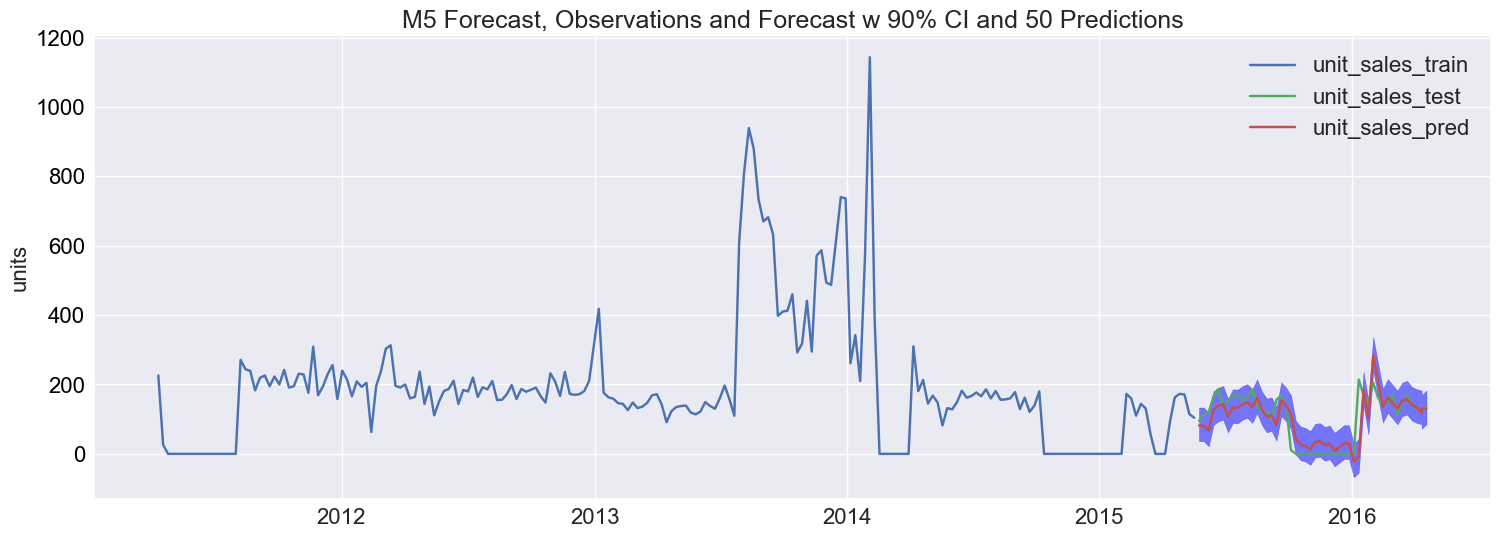

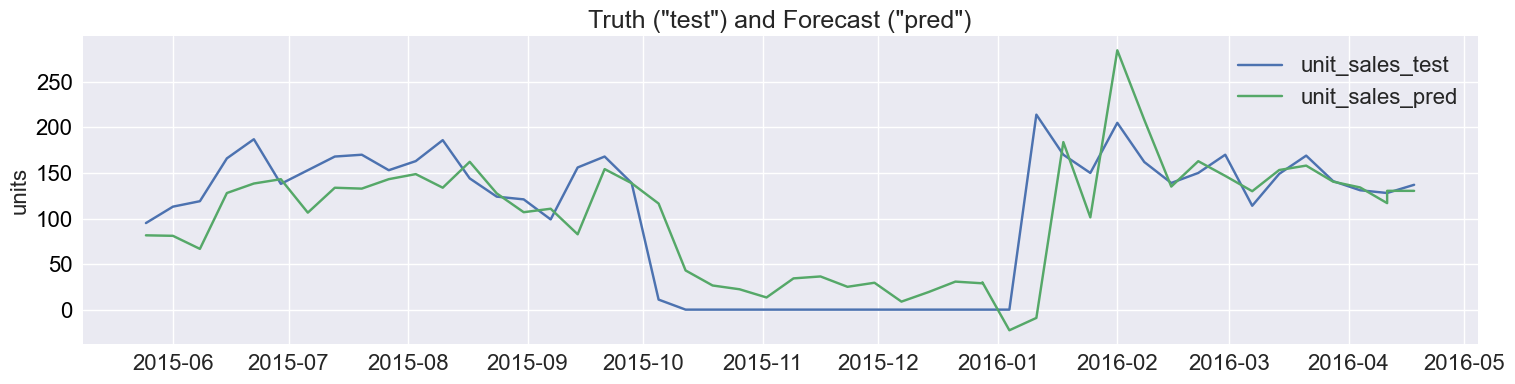

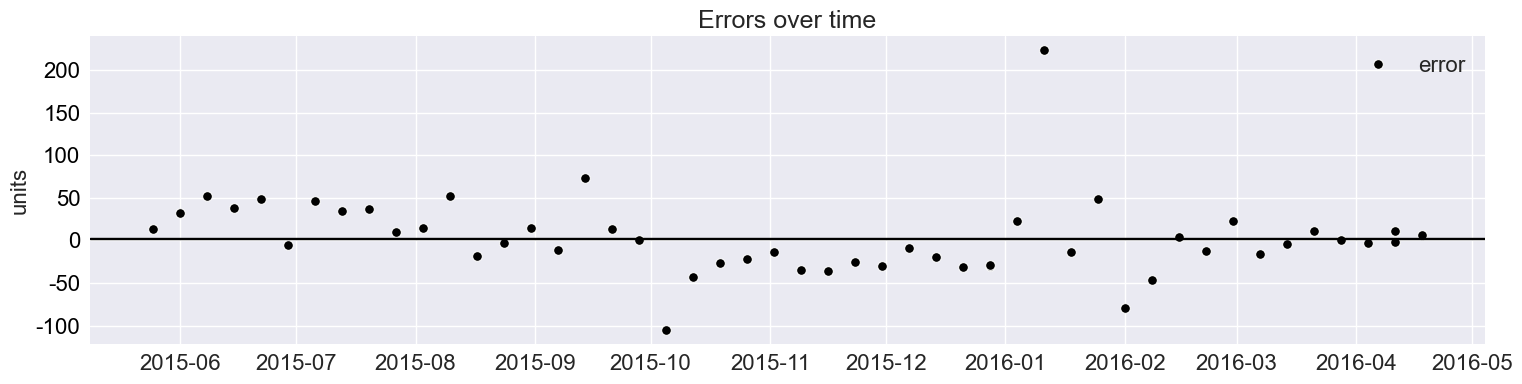

In [4]:

file =  '../data/m5_forecast_results_FOODS_3_030_TX_3_ci90_npred50.csv'
df = pd.read_csv(file, parse_dates = ["yearweek_dt"])
error_avg = df["error"].mean()
print(f'error_avg = {error_avg:1.2f}')

display(df.tail())

bp.lineplot(df, x= "yearweek_dt", y=["unit_sales_train", "unit_sales_test", "unit_sales_pred"],
            y_axis_label = "units", y_axis_format=".0f", yfb=("units_pred_lower","units_pred_upper"),
            yfb_color="blue", title="M5 Forecast, Observations and Forecast w 90% CI and 50 Predictions",
            figsize= (18,6))


bp.lineplot(df.tail(50), x="yearweek_dt", y=["unit_sales_test","unit_sales_pred"],
            y_axis_label = "units", y_axis_format=".0f", 
            title = 'Truth ("test") and Forecast ("pred")',
            figsize=(18,4))



bp.lineplot(df.tail(50), x="yearweek_dt", y="error",  h_line = [error_avg, 2], 
            y_axis_label = "units", y_axis_format=".0f",linestyle="None", marker="o", color="k", 
            title = "Errors over time",
            figsize=(18,4))

# Scatter Plot

,seller_id,units_total,nonzero_demand_periods,n_time_periods,units_mean,units_std,COV2,ADI,type
product_id,,,,,,,,,
422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,793.0,58,68,13.672414,18.226054,1.777031,1.172414,Eratic
aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,640.0,38,56,16.842105,13.097403,0.604752,1.473684,Lumpy
368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,551.0,57,58,9.666667,9.588560,0.983905,1.017544,Eratic
53759a2ecddad2bb87a079a1f1519f73,1f50f920176fa81dab994f9023523100,545.0,61,73,8.934426,10.811828,1.464418,1.196721,Eratic
99a4788cb24856965c36a24e339b6058,4a3ca9315b744ce9f8e9374361493884,536.0,72,77,7.444444,5.218842,0.491455,1.069444,Eratic


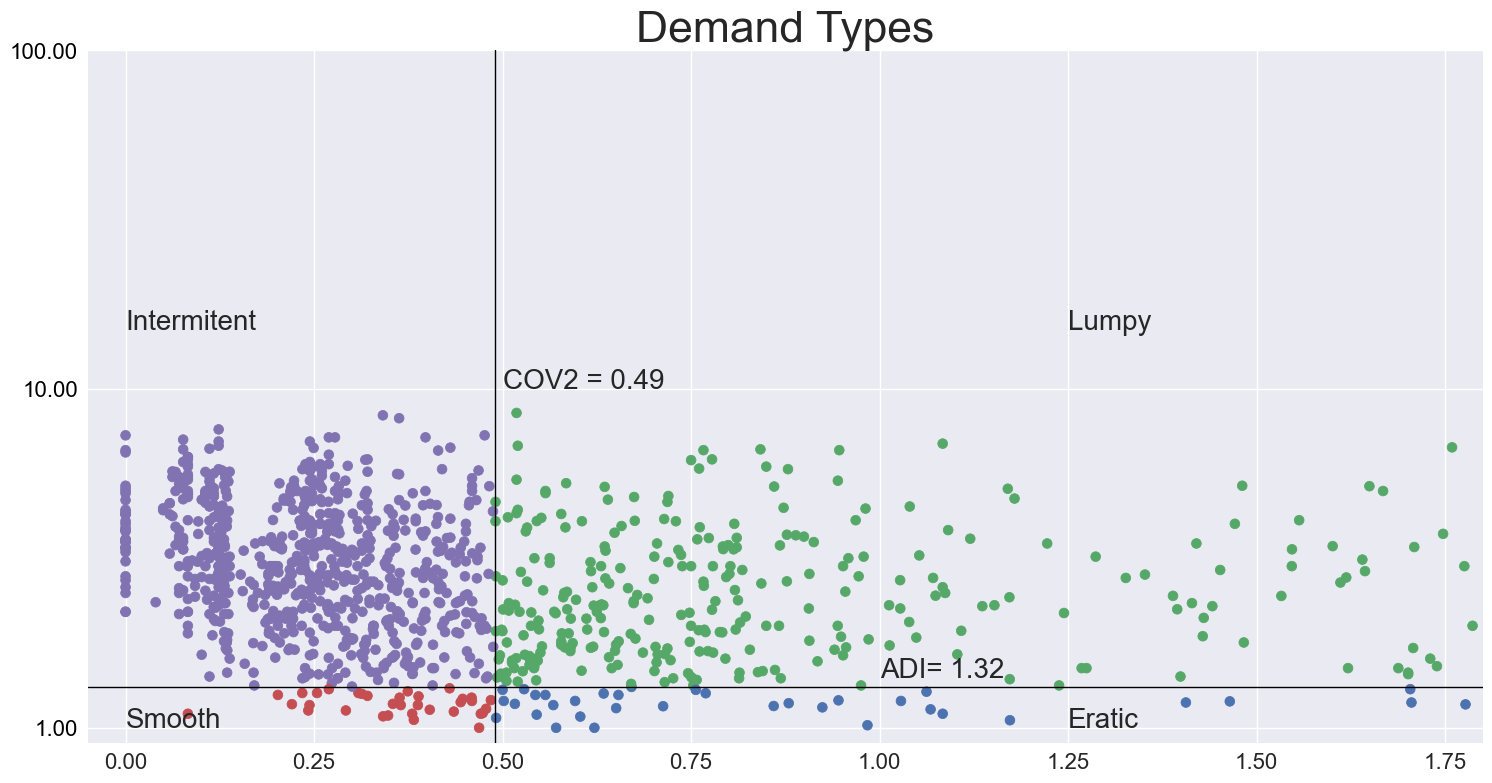

In [5]:
# Data ... Olist Ecommerce Demand Type


file =  '../data/olist_orders_demand_type_minnzp10_20220817.csv'
df = pd.read_csv(file,index_col=0)

display(df.head())


bp.scatterplot(df, 'COV2', 'ADI' , h_line=1.32, v_line=0.49,  y_scale="log" , hue='type', figsize=(18,9),
     legend=False,  annotate = [ ('ADI= 1.32', (1, 1.4) ), 
                                       ('COV2 = 0.49' ,(0.5 ,10)),
                                       ('Smooth',(0,1)),
                                       ('Intermitent',(0,15)),
                                       ('Lumpy',(1.25,15)),
                                       ('Eratic',(1.25,1))],
            annotate_fontsize = 20, title='Demand Types', title_fontsize = 32)

# help
Issuing help on each of the funtions lists documentation on the how the function operates and its inputs and outputs.

## help plot_defaults

In [6]:
help(bp.plot_defaults)

Help on function plot_defaults in module beautifulplots.beautifulplots:

plot_defaults()
    Dictionary of plot parameters. Each parameter coresponds and corresponding value. 
    See also get_plot_options for extracting plot options from **kwargs. 
    
    **Axis - x, y, and plot area parameters**
    
    Args:
        df (DataFrame): The input DataFrame containing colums corresponding to bar values and columns.
    
        title (String): corresponds to the axis title. default = ''
            
        title_fontsize: font size of the axis title, default = 18
         
        x_lims: (xmin, xmax), minimum and maximum x-values of the axis. default = None, in which case the min and max are set automatically by matplotlib.
        
        y_lims: (ymin,ymax), minimum and maximum y-values of the axis. default = None, in which case the min and max are set automatically by matplotlib.
        
        y2_lims: (ymin,ymax), minimum and maximum y-values of the secondary axis. default = 

## help barplot

In [7]:
help(bp.barplot)

Help on function barplot in module beautifulplots.barplot:

barplot(df, bar_columns, bar_values, barcurrency=None, barorientation='v', bardataformat='1.2f', y2=None, estimator=<built-in function sum>, estimator2=<built-in function sum>, ax=None, bardatalabels=False, test_mode=False, bardatafontsize=14, **kwargs)
    Bar plot function designed for ease of use and aesthetics. 
    The underlying barplot is ased on the Seaborn with additions, such as secondary axis, data labels,
    and improved default parameters. Refer to beautifulplots plot_defaults for a complete list of options.
    
    Args:
        df (DataFrame): The input DataFrame containing colums corresponding to bar_plot values ("bar_values") and column names (see examples in documentation)
            
        bar_columns: Datafrae columns corresponding to bar column names
            
        bar_values: Dataframe column corresponding to bar column values
            
        ax (axis): matplotlib axis (optional), default 

## help lineplot

In [8]:
help(bp.lineplot)

Help on function lineplot in module beautifulplots.lineplot:

lineplot(df, x, y, y2=None, ax=None, test_mode=False, estimator=None, estimator2=None, **kwargs)
    Lineplot function designed for ease of use and aesthetics. Based on the
    Seaborn lineplot, with additions such as secondary axis, ease of use, and 
    improved default parameters. Refer to beautiful plot_defaults for full list of options.
    
    Args:
        df (Dataframe): The input DataFrame containing colums corresponding to x and y     
            
        x: Dataframe column corresponding to the lineplot x-axis
            aldfsd;lfj
        
        y: Dolumn or list of columns corresponding to the lineplot y-axis
            
        y2: Column or list of columns correspondng to the secondary axis, default = None 
        
        yaxisformat: default = "1.2f" 
        
        ycurrency: default = None. Primary y-axis. For example = "$" to prepend dollar symbol.
        
        y2currency: default = None. Sec

## help Scatterplot

In [9]:
help(bp.scatterplot)

Help on function scatterplot in module beautifulplots.scatterplot:

scatterplot(df, x, y, ax=None, test_mode=False, **kwargs)
    Scatterplot function. 
    The underlying barplot is ased on the Seaborn with additions, such as data labels,
    and improved default parameters. Refer to beautifulplots plot_defaults for a complete list of options.
    
    Args:
        df (DataFrame): The input DataFrame containing colums corresponding to bar_plot values ("bar_values") and column names (see examples in documentation)
            
        x: Dataframe column corresponding to the  x-axis
        
        y: Column or list of columns corresponding to the y-axis
            
        ax (axis): matplotlib axis (optional), default = None. If axis is None, then create a matplolib figure, axis to host the barplot
            
        color: default = None (Matplotlib default). Matplotlib compatabile color name as text or RGB values, for example, color = [51/235,125/235,183/235].
            
   

## help Beautifulplots

You may notice lots of potential input arguements in the above examples
beyound the basic signature of the function. This is done by handling the additional
arguments in the **kwargs parameters and passing them down into the Beautifulplots
plot options dictionary. See below.

In [10]:
help(bp.beautifulplots)

Help on module beautifulplots.beautifulplots in beautifulplots:

NAME
    beautifulplots.beautifulplots

FUNCTIONS
    get_kwargs(**kwargs)
        process **kwargs options corresponding to the plot_defaults dictionary (see above)
        If a beautifulplots plot_option dictionary key is 
        contained in the **kwargs then the plot_defautls[key] value is replaced 
        with that found in **kwargs. 
        
        Returns:
            Dictionary: {parameter1:value1, parameter2:value2, ...} dictionary corresponding to plot options
    
    plot_defaults()
        Dictionary of plot parameters. Each parameter coresponds and corresponding value. 
        See also get_plot_options for extracting plot options from **kwargs. 
        
        **Axis - x, y, and plot area parameters**
        
        Args:
            df (DataFrame): The input DataFrame containing colums corresponding to bar values and columns.
        
            title (String): corresponds to the axis title. defau